# **Stroke** **Prediction**

The aim of this project is to predict the likelihood of a patient experiencing a stroke based on various input parameters such as gender, age, presence of diseases, and smoking status.

According to the World Health Organization (WHO), stroke is the second leading cause of death worldwide, responsible for approximately 11% of total deaths. This project should aim to leverage machine learning techniques to build a predictive model that can identify individuals at risk of stroke based on their demographic and health-related features. By detecting high-risk individuals early, appropriate preventive measures can be taken to reduce the incidence and impact of stroke.


**About** **the** **dataset**.

The dataset contains information necessary to predict the occurrence of a stroke. Each row in the dataset represents a patient, and the dataset includes the following attributes:


**Data** **Dictionary.**

| Attribute          | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| id                 | Unique identifier                                                           |
| gender             | "Male", "Female", or "Other"                                                |
| age                | Age of the patient                                                          |
| hypertension       | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension |
| heart_disease      | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease|
| ever_married       | "No" or "Yes"                                                               |
| work_type          | "Children", "Govt_job", "Never_worked", "Private", or "Self-employed"       |
| Residence_type     | "Rural" or "Urban"                                                          |
| avg_glucose_level  | Average glucose level in the blood                                          |
| bmi                | Body mass index                                                             |
| smoking_status     | "Formerly smoked", "Never smoked", "Smokes", or "Unknown"                   |
| stroke             | 1 if the patient had a stroke, 0 if not                                     |

**Potential analysis in this project.**

| Analysis Type               | Description                                                                                                |
|-----------------------------|------------------------------------------------------------------------------------------------------------|
| Exploratory Data Analysis (EDA) | Analyze the distribution of variables, identify missing values, and visualize relationships between features and the target variable (stroke). |
| Data Preprocessing          | Handle missing values, encode categorical variables, and scale numerical features if necessary.             |
| Feature Selection           | Identify the most relevant features for predicting stroke.                                                  |
| Model Selection             | Evaluate different classification models (e.g., Logistic Regression, Decision Tree, Random Forest, SVM) to find the best performing one. |
| Model Training and Evaluation | Train the selected model on the preprocessed data and evaluate its performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score, AUC). |
| Model Interpretation        | Interpret the model to understand which features are most influential in predicting stroke.                 |
| Prediction and Conclusion   | Summarize the findings of the project.          |

**Importing** **the** **required** **libraries**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

**Loading** **the** **dataframe**.

In [ ]:
# Load the dataset
df = pd.read_csv('stroke.csv')

# Display the first few rows and the info to get a sense of the data
display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Data** **Preprocessing** **Part** **1**

In [ ]:
# Check the shape of the dataset
display(df.shape)

(5110, 12)

In [ ]:
# Check the information of the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

There are missing values in the 'bmi'column. So before proceeding with the analysis,I am going to handle these missing values.I will use the median to fill the missing values, as it is less sensitive to outliers than the mean.

In [ ]:
# Fill missing BMI values with the median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Verify that there are no more missing values in 'bmi'
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

The column 'id' is a unique identifier and does not provide predictive power for the model,so I will drop this column.

In [ ]:
# Drop the 'id' column
df = df.drop('id', axis=1)

# Display the first few rows to confirm the column is dropped
display(df.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Display value counts for each categorical column
for col in categorical_cols:
    display(f"Value counts for column: {col}")
    display(df[col].value_counts())

'Value counts for column: gender'

,count
gender,
Female,2994
Male,2115
Other,1


'Value counts for column: ever_married'

,count
ever_married,
Yes,3353
No,1757


'Value counts for column: work_type'

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


'Value counts for column: Residence_type'

,count
Residence_type,
Urban,2596
Rural,2514


'Value counts for column: smoking_status'

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


**Descriptive** **statistics**

In [ ]:
display(df.describe())

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
display(df.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Exploratory** **Data** **Analysis**

In the exploratory data analysis, I will be looking at the distribution of the data acroos all the variables and relationships between the variables and the target variable. For this I will be plotting the dataset variables in different graphs and draw out insights from them.



**Target** **Variable** **Distribution**.

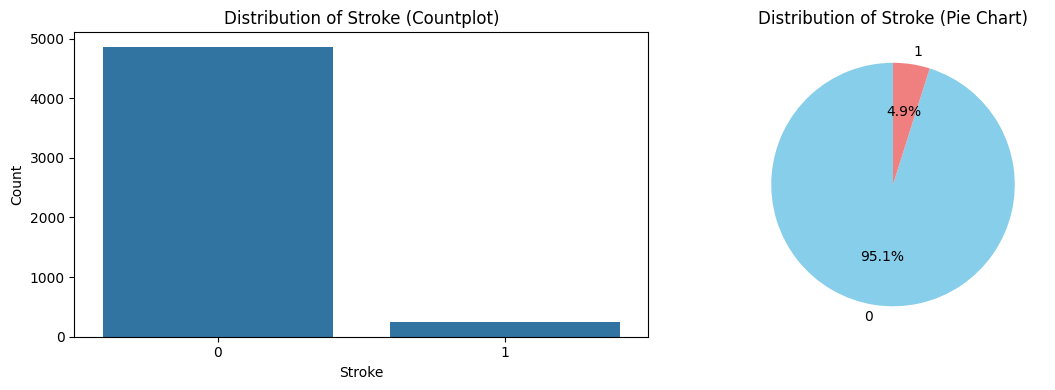

In [ ]:
# Visualize the distribution of the target variable 'stroke' using a countplot and pie chart
plt.figure(figsize=(12, 4))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke (Countplot)')
plt.xlabel('Stroke')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
df['stroke'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Stroke (Pie Chart)')
plt.ylabel('') # Hide the default 'stroke' label on the pie chart

plt.tight_layout()
plt.show()

Looking at the countplot and pie chart for the 'stroke' variable, I can see that the dataset is highly imbalanced. The vast majority of patients (95.1%) did not have a stroke, while only a small percentage (4.9%) did. This class imbalance is a significant insight and I will need to  considere this during model training and evaluation, as it can affect the performance of some machine learning algorithms.

**Gender** **and** **Stroke**

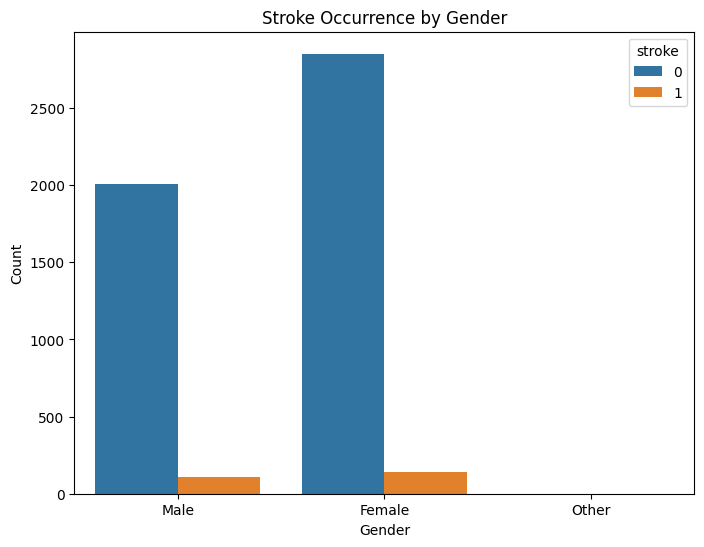

In [ ]:
# Visualize the relationship between 'gender' and 'stroke'
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Stroke Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Based on the plot of 'Stroke Occurrence by Gender', it appears that there are more stroke cases among females than males in this dataset. However, it's important to consider that there are also more female patients overall in the dataset.

**Age** **and** **Stroke**

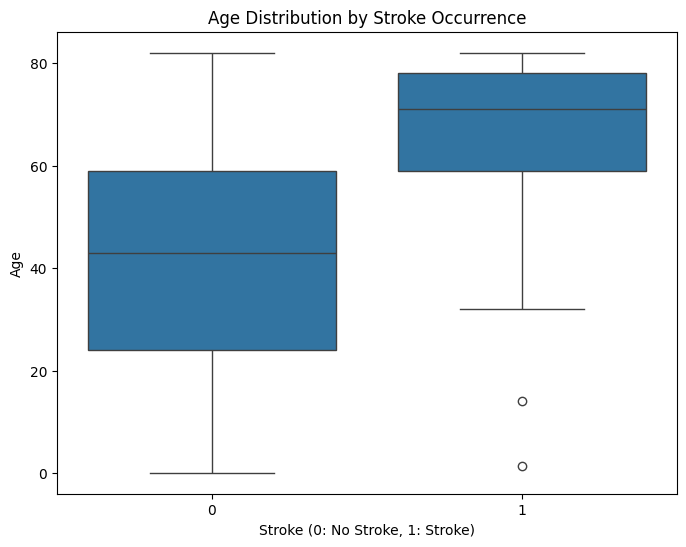

In [ ]:
# Visualize the relationship between 'age' and 'stroke' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Age Distribution by Stroke Occurrence')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Age')
plt.show()

The box plot shows the distribution of age for patients who had a stroke (1) and those who did not (0).

For patients who did not have a stroke (0), the box plot shows a relatively wide distribution of ages, with the median age being lower.
For patients who had a stroke (1), the box plot shows that the age distribution is shifted towards older ages, with a higher median age and a smaller range of ages within the box.
This suggests that older age is associated with a higher likelihood of having a stroke in this dataset.



**Hypertension** **and** **Stroke**

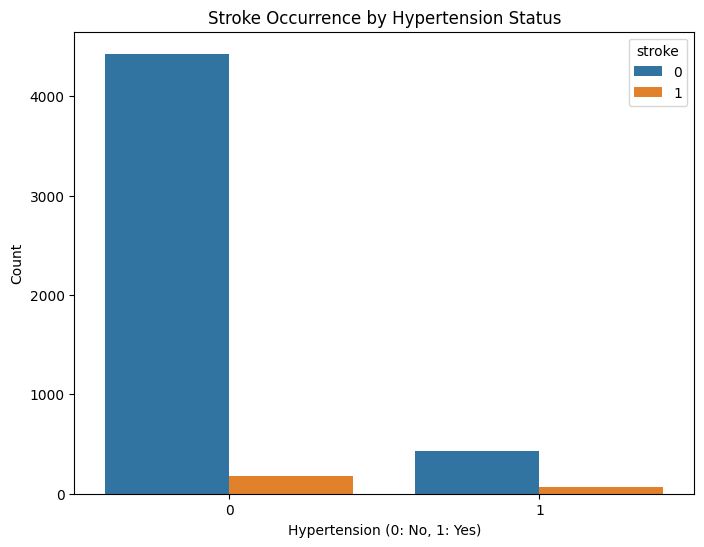

In [ ]:
# Visualize the relationship between 'hypertension' and 'stroke'
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Stroke Occurrence by Hypertension Status')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

The countplot shows the number of stroke cases for patients with and without hypertension.

The bars for 'hypertension' = 0 (no hypertension) show that a large majority of these patients did not have a stroke, with a small number of stroke cases.
The bars for 'hypertension' = 1 (hypertension) show that while the total number of patients with hypertension is much lower, the proportion of those who had a stroke appears higher compared to the non-hypertensive group.
This suggests that having hypertension is associated with an increased likelihood of having a stroke.



**heart_disease** **and** **Stroke**

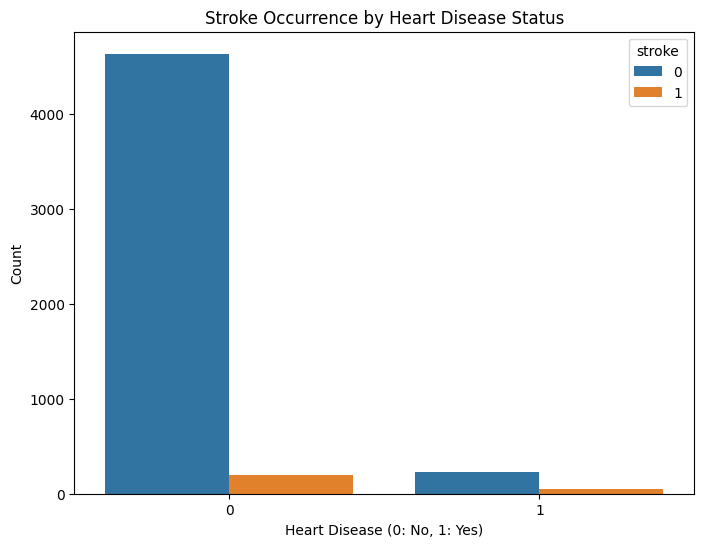

In [ ]:
# Visualize the relationship between 'heart_disease' and 'stroke'
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title('Stroke Occurrence by Heart Disease Status')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

The countplot shows the number of stroke cases for patients with and without heart disease.

The bars for 'heart_disease' = 0 (no heart disease) show that a large majority of these patients did not have a stroke, with a small number of stroke cases.
The bars for 'heart_disease' = 1 (heart disease) show that while the total number of patients with heart disease is much lower, the proportion of those who had a stroke appears higher compared to the group without heart disease.
This suggests that having heart disease is associated with an increased likelihood of having a stroke.



**ever_married** **and** **Stroke**

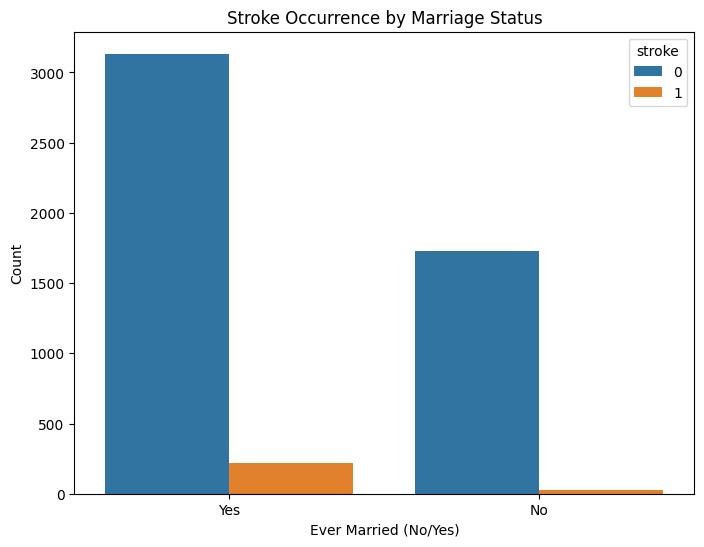

In [ ]:
# Visualize the relationship between 'ever_married' and 'stroke'
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', hue='stroke', data=df)
plt.title('Stroke Occurrence by Marriage Status')
plt.xlabel('Ever Married (No/Yes)')
plt.ylabel('Count')
plt.show()

The countplot shows the number of stroke cases for patients based on their marriage status.

The bars for 'ever_married' = 'Yes' show a higher number of stroke cases compared to those who were never married.
The bars for 'ever_married' = 'No' show a significantly lower number of stroke cases.
This suggests that patients who have been married at some point are more likely to have a stroke than those who have never been married.



**work_type** **and** **Stroke**

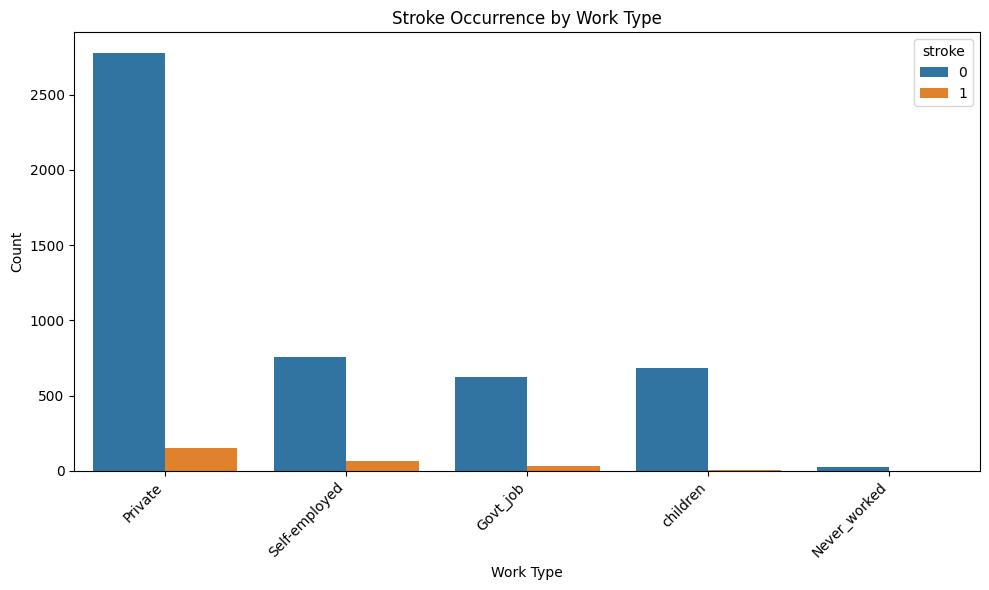

In [ ]:
# Visualize the relationship between 'work_type' and 'stroke'
plt.figure(figsize=(10, 6))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title('Stroke Occurrence by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()



Private and Self-employed categories show the highest counts of both stroke and no stroke cases, which is expected as they are the largest work type categories.
When looking at the proportion of stroke cases within each work type, the "Never_worked" category appears to have a very low count of stroke cases, likely due to the small sample size in this category.

**Residence_type** **and** **Stroke**

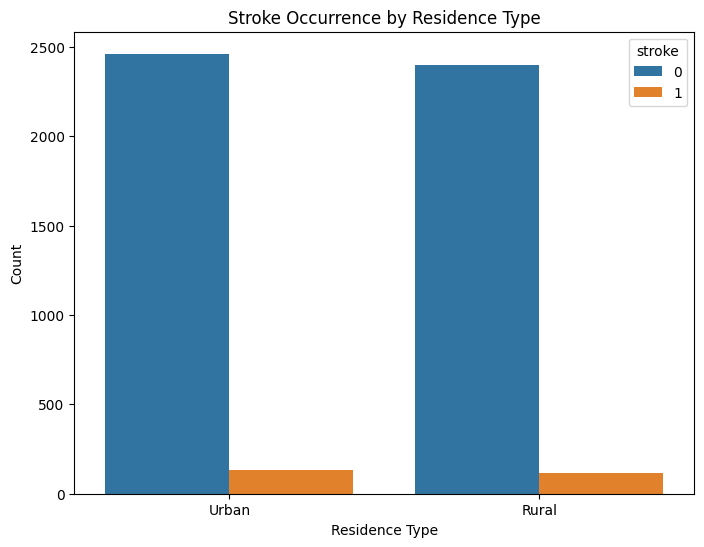

In [ ]:
# Visualize the relationship between 'Residence_type' and 'stroke'
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.title('Stroke Occurrence by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.show()

The counts of stroke and no-stroke cases appear to be very similar between Urban and Rural residence types.
This suggests that based on this dataset, there does not seem to be a strong visual relationship between residence type and the occurrence of stroke. The distribution of stroke cases seems relatively even across both urban and rural areas.

**avg_glucose_level** **and** **Stroke**

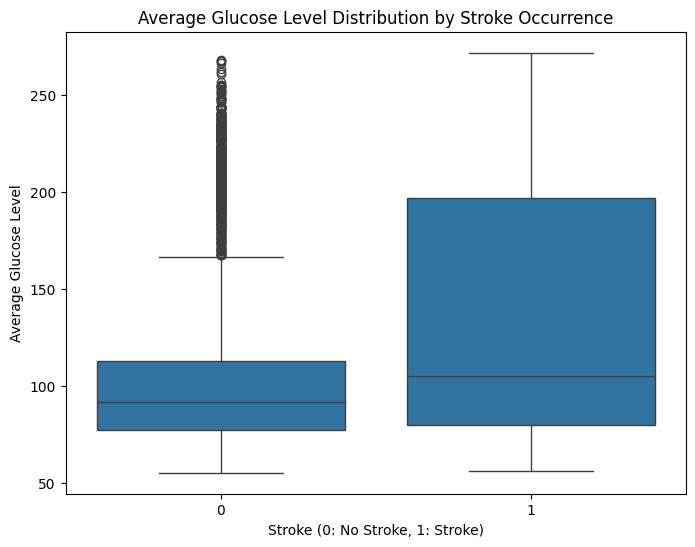

In [ ]:
# Visualize the relationship between 'avg_glucose_level' and 'stroke' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.title('Average Glucose Level Distribution by Stroke Occurrence')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('Average Glucose Level')
plt.show()

The box plot shows the distribution of average glucose levels for patients who had a stroke (1) and those who did not (0).
For patients who did not have a stroke (0), the box plot shows a wider distribution of average glucose levels with a lower median.
For patients who had a stroke (1), the box plot shows that the distribution of average glucose levels is shifted towards higher values, with a higher median. There also appear to be more outliers with very high glucose levels in the stroke group.
This suggests that higher average glucose levels are associated with a higher likelihood of having a stroke in this dataset.

**bmi** **and** **Stroke**

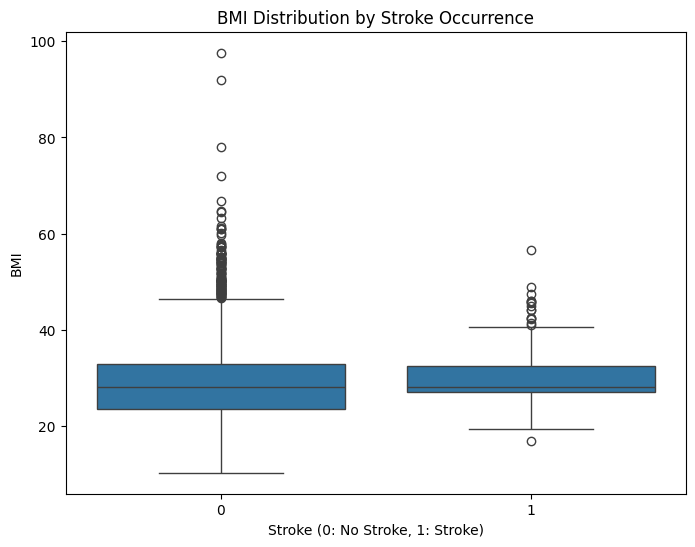

In [ ]:
# Visualize the relationship between 'bmi' and 'stroke' using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title('BMI Distribution by Stroke Occurrence')
plt.xlabel('Stroke (0: No Stroke, 1: Stroke)')
plt.ylabel('BMI')
plt.show()

The box plot shows the distribution of BMI for patients who had a stroke (1) and those who did not (0).
The median BMI for patients who had a stroke appears to be slightly higher than for those who did not have a stroke.
However, the distributions of BMI for both groups largely overlap, and there are many outliers in both groups.
This suggests that while there might be a subtle association, BMI alone may not be as strong a predictor of stroke as some of the other variables we've looked at (like age, hypertension, and average glucose level) in this dataset.

**smoking_status** **and** **Stroke**

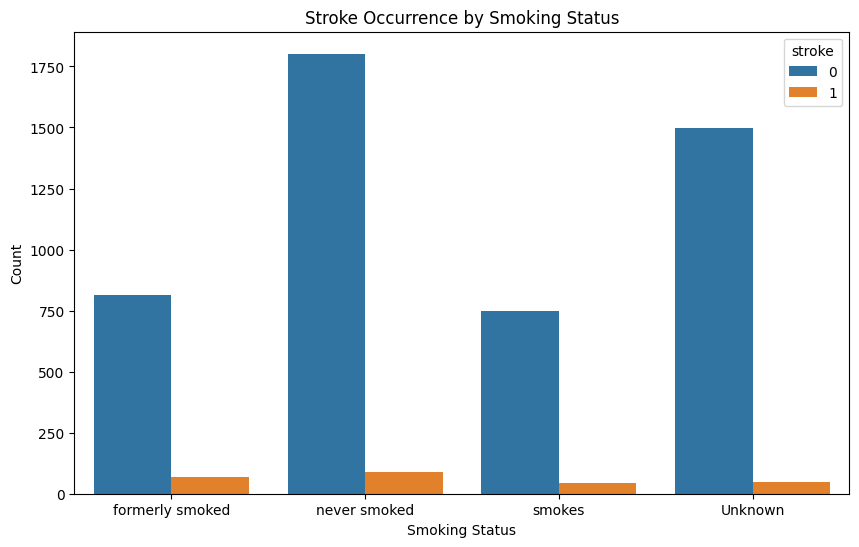

In [ ]:
# Visualize the relationship between 'smoking_status' and 'stroke'
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Stroke Occurrence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

The "never smoked" category has the highest count of patients overall, and also the highest count of patients without a stroke.
The "Unknown" smoking status also has a significant number of patients, with a large majority not having a stroke.
The "formerly smoked" and "smokes" categories have fewer patients overall compared to "never smoked" and "Unknown". However, they show a noticeable number of stroke cases relative to their total counts.
This suggests that while the "never smoked" category has the highest absolute number of stroke cases (simply because it's the largest group), the proportion of stroke cases might be higher in the "formerly smoked" and "smokes" categories.

# **Data** **Preprocessing** **Part** **2**

**Label** **Encoding** **the** **Categorical** **Variables**

In [ ]:
# Select categorical columns excluding 'gender' and 'ever_married' for one-hot encoding
categorical_cols_onehot = ['work_type', 'Residence_type', 'smoking_status']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols_onehot, drop_first=True)

# Apply Label Encoding to 'gender' and 'ever_married'
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])

# Display the first few rows of the encoded dataframe
display(df.head())

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,False,True,False,False,True,True,False,False
1,0,61.0,0,0,1,202.21,28.1,1,False,False,True,False,False,False,True,False
2,1,80.0,0,1,1,105.92,32.5,1,False,True,False,False,False,False,True,False
3,0,49.0,0,0,1,171.23,34.4,1,False,True,False,False,True,False,False,True
4,0,79.0,1,0,1,174.12,24.0,1,False,False,True,False,False,False,True,False


**Correlation** **Matrix** **Heatmap**

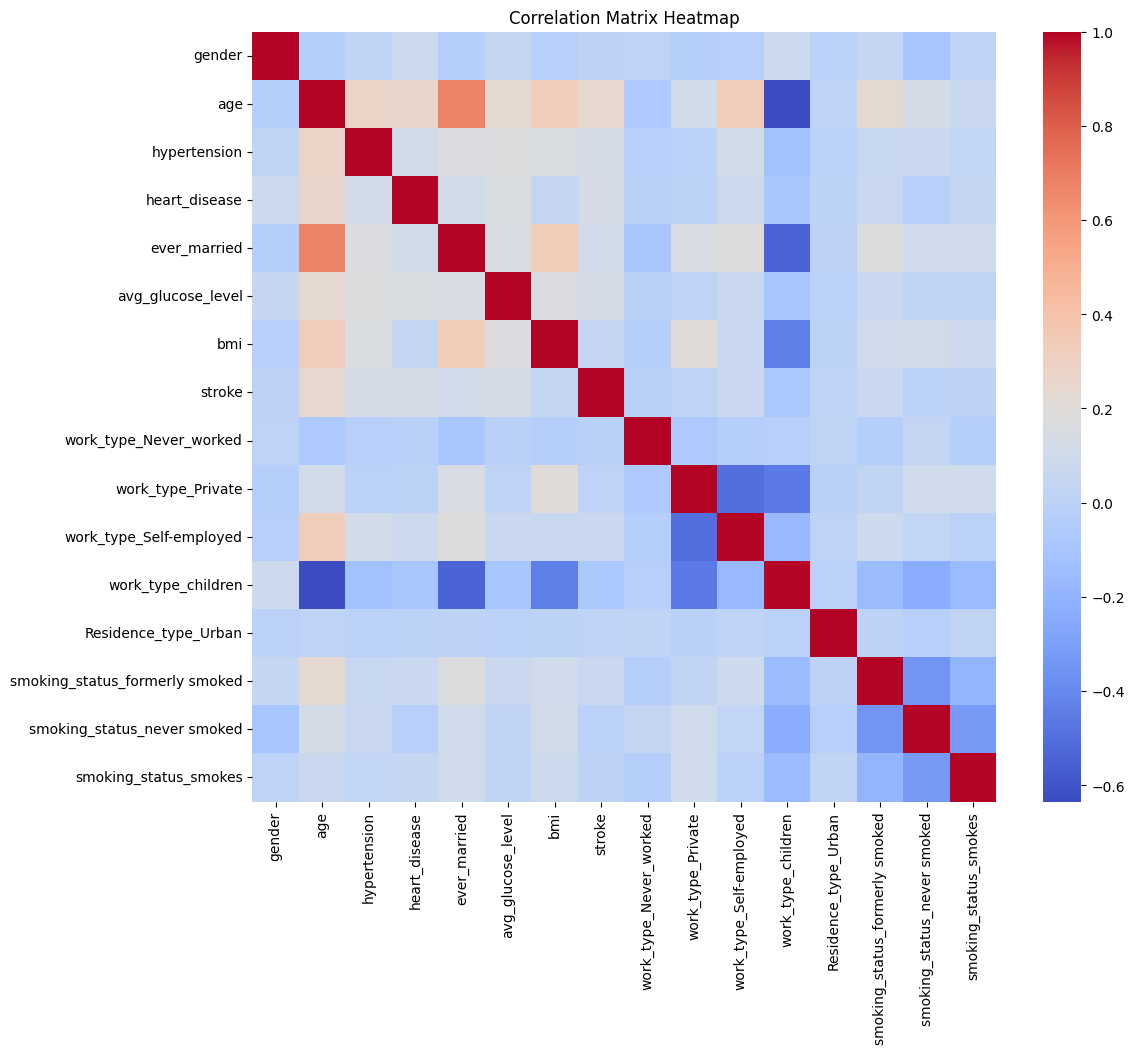

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Train** **Test** **Split**

In [ ]:
# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
display("Shape of X_train:", X_train.shape)
display("Shape of X_test:", X_test.shape)
display("Shape of y_train:", y_train.shape)
display("Shape of y_test:", y_test.shape)

'Shape of X_train:'

(4088, 15)

'Shape of X_test:'

(1022, 15)

'Shape of y_train:'

(4088,)

'Shape of y_test:'

(1022,)

Now, I am going to apply feature scaling and SMOTE technique to the training data.

In [ ]:
# Apply feature scaling to the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Display the shapes of the resampled training data
display("Shape of X_train_resampled:", X_train_resampled.shape)
display("Shape of y_train_resampled:", y_train_resampled.shape)

'Shape of X_train_resampled:'

(7778, 15)

'Shape of y_train_resampled:'

(7778,)

# **Stroke** **Prediction** **Models**



For predicting the risk of Stroke, I will be using the following models:


*   Logistic Regression
*   Random Forest Classifier

*   Decision Tree Classifier
*   Support Vector Classfier


*   XGBoost








**Logistic** **Regression**

In [ ]:
# Create a Logistic Regression model object
log_reg_clf = LogisticRegression(random_state=42)

**Hyperparameter** **Tuning** **using** **GridSearchCV**

In [ ]:
# Define the hyperparameter grid for Logistic Regression
log_reg_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

# Create a pipeline for Logistic Regression
pipeline_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

In [ ]:
# Implement GridSearchCV for Logistic Regression
grid_search_log_reg = GridSearchCV(estimator=pipeline_log_reg, param_grid=log_reg_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV on the resampled training data
grid_search_log_reg.fit(X_train_resampled, y_train_resampled)

# Display the best parameters and best score
display("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
display("Best F1-score for Logistic Regression:", grid_search_log_reg.best_score_)

'Best parameters for Logistic Regression:'

{'classifier__C': 0.001,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

'Best F1-score for Logistic Regression:'

np.float64(0.8098195338562169)

**Random** **Forest** **Classifier**

In [ ]:
# Create a Random Forest Classifier model
rf_clf = RandomForestClassifier(random_state=42)

**Hyperparameter** **Tuning** **using** **GridSearchCV**

In [ ]:
# Define the hyperparameter grid for Random Forest Classifier
rf_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a pipeline for Random Forest Classifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Implement GridSearchCV for Random Forest Classifier
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=rf_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV on the resampled training data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters and best score
display("Best parameters for Random Forest Classifier:", grid_search_rf.best_params_)
display("Best F1-score for Random Forest Classifier:", grid_search_rf.best_score_)

'Best parameters for Random Forest Classifier:'

{'classifier__criterion': 'gini',
 'classifier__max_depth': 20,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 200}

'Best F1-score for Random Forest Classifier:'

np.float64(0.9603377842453016)

**Decision** **Tree** **Classifier**

In [ ]:
# Create a Decision Tree Classifier model
dt_clf = DecisionTreeClassifier(random_state=42)

**Hyperparameter** **Tuning** **using** **GridSearchCV**

In [ ]:
# Define the hyperparameter grid for Decision Tree Classifier
dt_param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Create a pipeline for Decision Tree Classifier
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [ ]:
# Implement GridSearchCV for Decision Tree Classifier
grid_search_dt = GridSearchCV(estimator=pipeline_dt, param_grid=dt_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV on the resampled training data
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Display the best parameters and best score
display("Best parameters for Decision Tree Classifier:", grid_search_dt.best_params_)
display("Best F1-score for Decision Tree Classifier:", grid_search_dt.best_score_)

'Best parameters for Decision Tree Classifier:'

{'classifier__criterion': 'gini',
 'classifier__max_depth': 20,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2}

'Best F1-score for Decision Tree Classifier:'

np.float64(0.9145745135141116)

**Support** **Vector** **Classifier**

In [ ]:
# Create a Support Vector Classifier model
svc_clf = SVC(random_state=42)

**Hyperparameter** **Tuning** **using** **GridSearchCV**

In [ ]:
# Define the hyperparameter grid for Support Vector Classifier
svc_param_grid = {
    'classifier__C': [0.1, 1],
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['linear', 'rbf']
}

# Create a pipeline for Support Vector Classifier
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42))
])

In [ ]:
# Implement GridSearchCV for Support Vector Classifier
grid_search_svc = GridSearchCV(estimator=pipeline_svc, param_grid=svc_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV on the resampled training data
grid_search_svc.fit(X_train_resampled, y_train_resampled)

# Display the best parameters and best score
display("Best parameters for Support Vector Classifier:", grid_search_svc.best_params_)
display("Best F1-score for Support Vector Classifier:", grid_search_svc.best_score_)

'Best parameters for Support Vector Classifier:'

{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

'Best F1-score for Support Vector Classifier:'

np.float64(0.8920897993720786)

**XGBoost** **Model**

In [ ]:
# Create an XGBoost model
xgb_clf = XGBClassifier(random_state=42)

**Hyperparameter** **Tuning** **using** **GridSearchCV**

In [ ]:
# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.9, 1.0],
    'classifier__colsample_bytree': [0.9, 1.0]
}

# Create a pipeline for XGBoost
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42))
])

In [ ]:
# Implement GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=xgb_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV on the resampled training data
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Display the best parameters and best score
display("Best parameters for XGBoost:", grid_search_xgb.best_params_)
display("Best F1-score for XGBoost:", grid_search_xgb.best_score_)

'Best parameters for XGBoost:'

{'classifier__colsample_bytree': 0.9,
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100,
 'classifier__subsample': 0.9}

'Best F1-score for XGBoost:'

np.float64(0.9291516097735446)

# **Model** **Evaluation**

**Confusion** **Matrix**

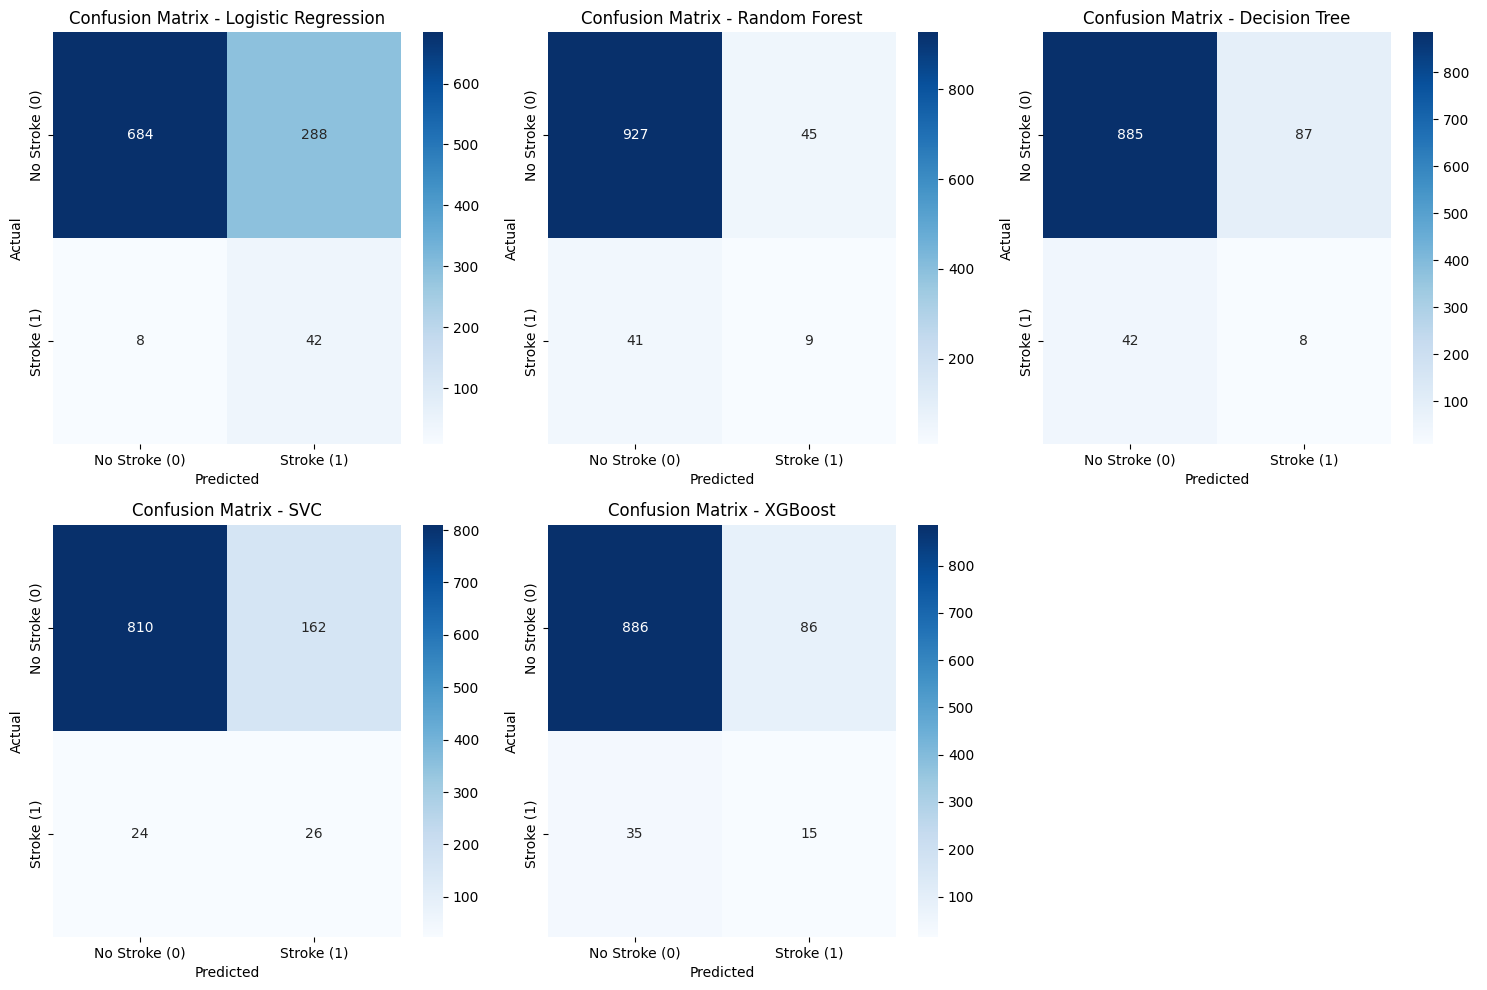

In [ ]:
# Make predictions on the test set using the best estimator from each GridSearchCV
# Scale the X_test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

y_pred_log_reg = grid_search_log_reg.best_estimator_.predict(X_test_scaled)
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_scaled)
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test_scaled)
y_pred_svc = grid_search_svc.best_estimator_.predict(X_test_scaled)
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test_scaled)

# Calculate confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Create a multi-panel plot for confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2x3 array of axes to easily iterate

cms = [cm_log_reg, cm_rf, cm_dt, cm_svc, cm_xgb]
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC', 'XGBoost']

for i, (cm, model_name) in enumerate(zip(cms, model_names)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(['No Stroke (0)', 'Stroke (1)'])
    axes[i].set_yticklabels(['No Stroke (0)', 'Stroke (1)'])

# Hide the last empty subplot since we only have 5 models
axes[5].axis('off')

plt.tight_layout() # Adjust layout to prevent titles/labels from overlapping
plt.show()

**Model** **Accuracy**

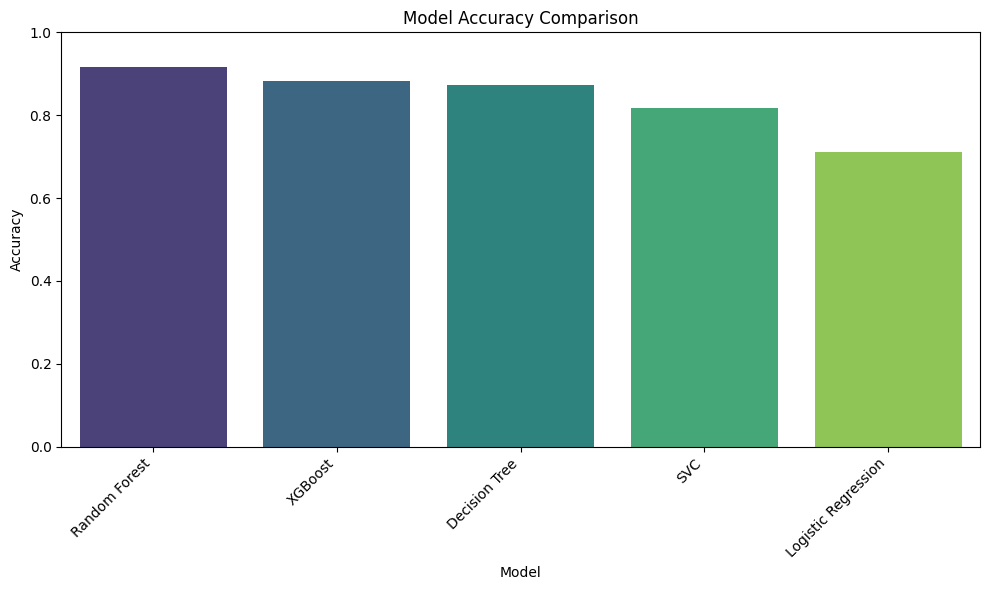

'Model Accuracy Scores:'

'Random Forest: 0.9159'

'XGBoost: 0.8816'

'Decision Tree: 0.8738'

'SVC: 0.8180'

'Logistic Regression: 0.7104'

In [ ]:
# Calculate accuracy for each model on the test set
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Create a dictionary of model accuracies
model_accuracies = {
    'Logistic Regression': accuracy_log_reg,
    'Random Forest': accuracy_rf,
    'Decision Tree': accuracy_dt,
    'SVC': accuracy_svc,
    'XGBoost': accuracy_xgb
}

# Sort the models by accuracy
sorted_accuracies = dict(sorted(model_accuracies.items(), key=lambda item: item[1], reverse=True))

# Create a bar chart of model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_accuracies.keys()), y=list(sorted_accuracies.values()), palette='viridis', hue=list(sorted_accuracies.keys()), legend=False)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for accuracy scores
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Display the accuracy scores
display("Model Accuracy Scores:")
for model, accuracy in sorted_accuracies.items():
    display(f"{model}: {accuracy:.4f}")

**Model** **Metrics**

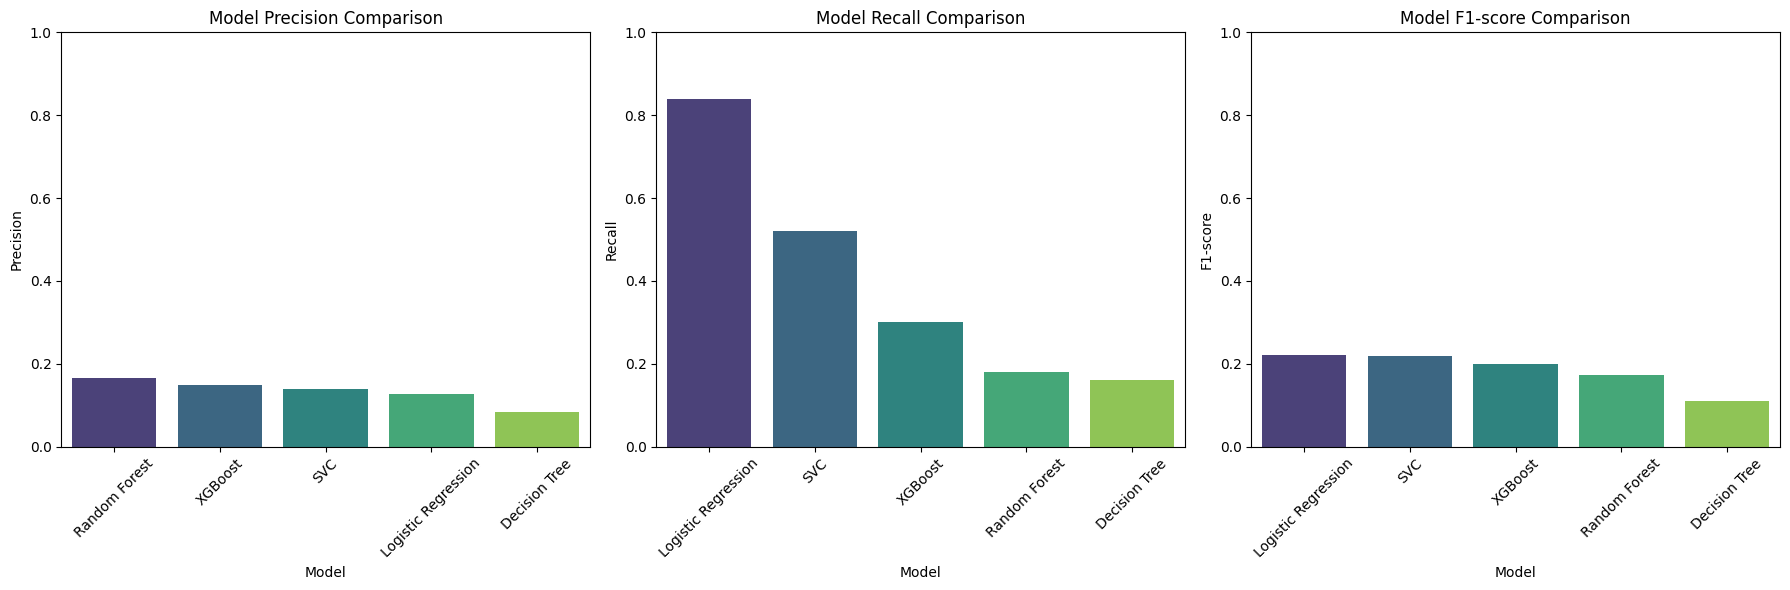

'\nModel Metrics Summary:'

,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.127273,0.84,0.221053
3,SVC,0.138298,0.52,0.218487
4,XGBoost,0.148515,0.30,0.198675
1,Random Forest,0.166667,0.18,0.173077
2,Decision Tree,0.084211,0.16,0.110345


In [ ]:
# Calculate precision, recall, and F1-score for each model on the test set
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_pred_dt, y_test)

precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)


# Create dictionaries for each metric
model_precision = {
    'Logistic Regression': precision_log_reg,
    'Random Forest': precision_rf,
    'Decision Tree': precision_dt,
    'SVC': precision_svc,
    'XGBoost': precision_xgb
}

model_recall = {
    'Logistic Regression': recall_log_reg,
    'Random Forest': recall_rf,
    'Decision Tree': recall_dt,
    'SVC': recall_svc,
    'XGBoost': recall_xgb
}

model_f1 = {
    'Logistic Regression': f1_log_reg,
    'Random Forest': f1_rf,
    'Decision Tree': f1_dt,
    'SVC': f1_svc,
    'XGBoost': f1_xgb
}

# Create a multi-panel bar chart for precision, recall, and F1-score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

metrics = [model_precision, model_recall, model_f1]
metric_names = ['Precision', 'Recall', 'F1-score']

for i, (metric_dict, metric_name) in enumerate(zip(metrics, metric_names)):
    sorted_metrics = dict(sorted(metric_dict.items(), key=lambda item: item[1], reverse=True))
    sns.barplot(x=list(sorted_metrics.keys()), y=list(sorted_metrics.values()), palette='viridis', hue=list(sorted_metrics.keys()), legend=False, ax=axes[i])
    axes[i].set_title(f'Model {metric_name} Comparison')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric_name)
    axes[i].set_ylim(0, 1) # Set y-axis limit from 0 to 1 for metric scores
    axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels

plt.tight_layout()
plt.show()

# Create a summary table of the metric scores
summary_data = {
    'Model': list(model_precision.keys()),
    'Precision': list(model_precision.values()),
    'Recall': list(model_recall.values()),
    'F1-Score': list(model_f1.values())
}
summary_df = pd.DataFrame(summary_data)

# Sort the summary table by F1-Score for better readability
summary_df = summary_df.sort_values('F1-Score', ascending=False)

# Display the summary table
display("\nModel Metrics Summary:")
display(summary_df)

**Feature** **Importance** **Analysis**

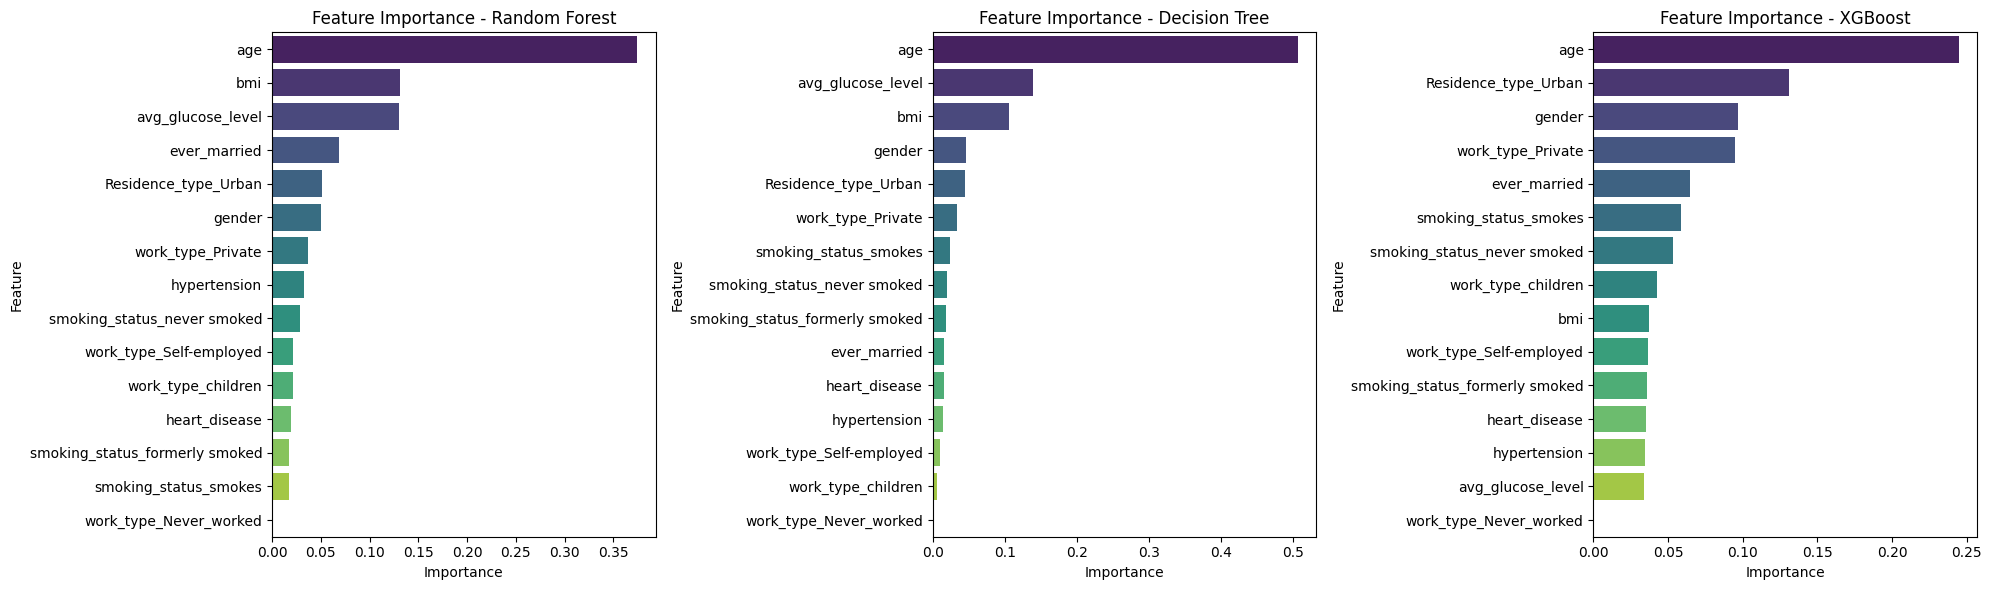

In [ ]:
# Get feature importances from the trained models
# Note: Logistic Regression and SVC do not have a direct feature_importances_ attribute
rf_importances = grid_search_rf.best_estimator_.named_steps['classifier'].feature_importances_
dt_importances = grid_search_dt.best_estimator_.named_steps['classifier'].feature_importances_
xgb_importances = grid_search_xgb.best_estimator_.named_steps['classifier'].feature_importances_

# Get feature names
feature_names = X_train.columns

# Create dataframes for feature importance
rf_importance_df = pd.DataFrame({'feature': feature_names, 'importance': rf_importances}).sort_values('importance', ascending=False)
dt_importance_df = pd.DataFrame({'feature': feature_names, 'importance': dt_importances}).sort_values('importance', ascending=False)
xgb_importance_df = pd.DataFrame({'feature': feature_names, 'importance': xgb_importances}).sort_values('importance', ascending=False)

# Create a multi-panel bar chart for feature importance
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes = axes.flatten()

importance_dfs = [rf_importance_df, dt_importance_df, xgb_importance_df]
model_names = ['Random Forest', 'Decision Tree', 'XGBoost']

for i, (importance_df, model_name) in enumerate(zip(importance_dfs, model_names)):
    sns.barplot(x='importance', y='feature', data=importance_df, ax=axes[i], palette='viridis', hue='feature', legend=False)
    axes[i].set_title(f'Feature Importance - {model_name}')
    axes[i].set_xlabel('Importance')
    axes[i].set_ylabel('Feature')

plt.tight_layout()
plt.show()

# **Conclusion**

In this project, I developed machine learning models to predict the likelihood of a patient experiencing a stroke based on various health and demographic factors. The process involved analyzing the dataset, performing exploratory data analysis, and developing predictive models using Logistic Regression, Random Forest, Decision Tree, Support Vector Classifier (SVC), and XGBoost. I evaluated the models using confusion matrices, accuracy, precision, recall, and F1 score metrics.



From the exploratory data analysis, I found out several factors to be associated with the risk of stroke, including age, hypertension, heart disease, average glucose level, marriage status, and smoking status. Older age, the presence of hypertension or heart disease, higher average glucose levels, and being married were generally associated with an increased likelihood of stroke. I also found the dataset to be highly imbalanced, which I addressed during preprocessing.



Among the machine learning models I employed, the Random Forest Classifier demonstrated the best performance with an accuracy of approximately 91.6%. While other models also showed promising results, Random Forest had the highest accuracy on the test set. Despite the high accuracy, the challenge of predicting the minority class (stroke) was evident in the lower precision, recall, and F1-scores across all models. The Random Forest model, however, still performed competitively across these metrics. This model can potentially be used to identify individuals at higher risk of stroke, enabling early intervention and the implementation of preventive strategies to reduce stroke incidence and impact.

